In [16]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Owner\Downloads\Customer Churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [18]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


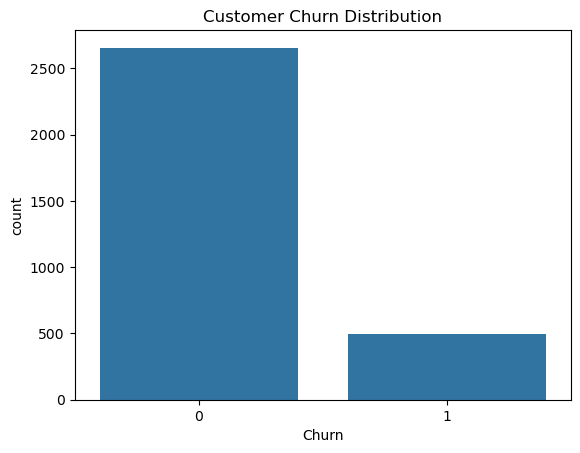

Churn rate: 15.71%


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()
churn_rate = df['Churn'].mean() * 100
print(f"Churn rate: {churn_rate:.2f}%")

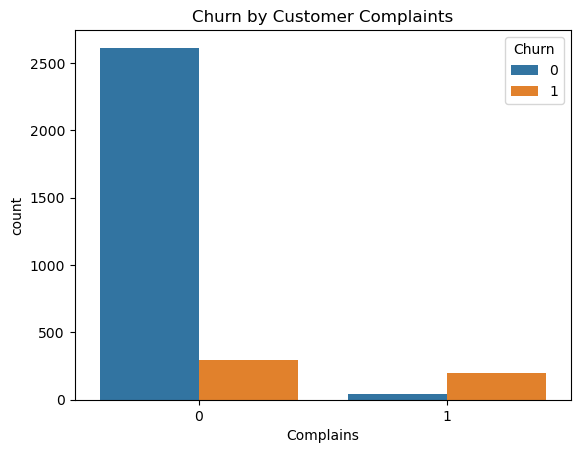

In [20]:
sns.countplot(x='Complains', hue='Churn', data=df)
plt.title("Churn by Customer Complaints")
plt.show()

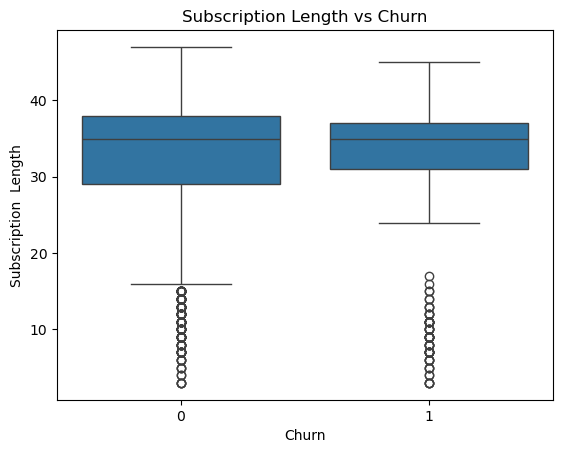

In [21]:
sns.boxplot(x='Churn', y='Subscription  Length', data=df)
plt.title("Subscription Length vs Churn")
plt.show()

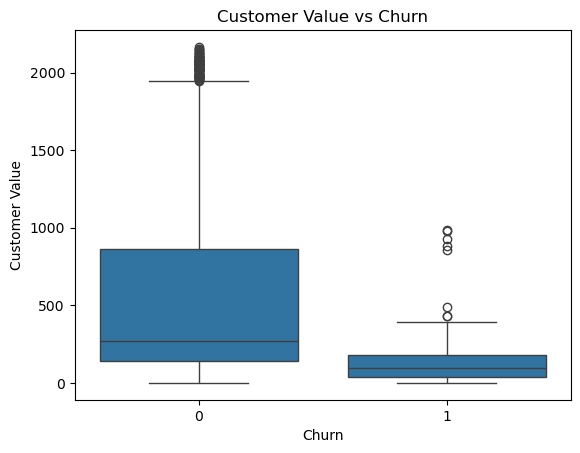

In [22]:
sns.boxplot(x='Churn', y='Customer Value', data=df)
plt.title("Customer Value vs Churn")
plt.show()

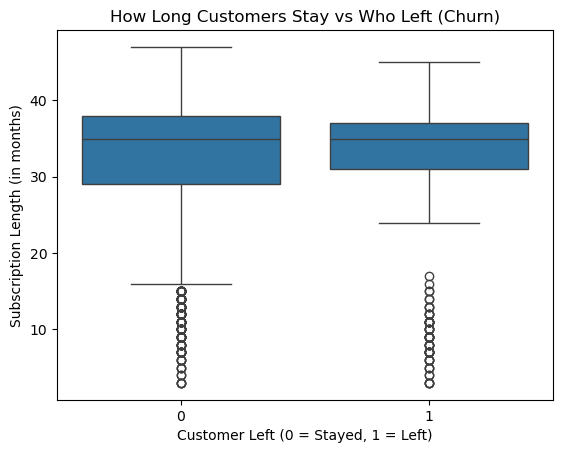

In [23]:
sns.boxplot(x='Churn', y='Subscription  Length', data=df)
plt.title("How Long Customers Stay vs Who Left (Churn)")
plt.xlabel("Customer Left (0 = Stayed, 1 = Left)")
plt.ylabel("Subscription Length (in months)")
plt.show()

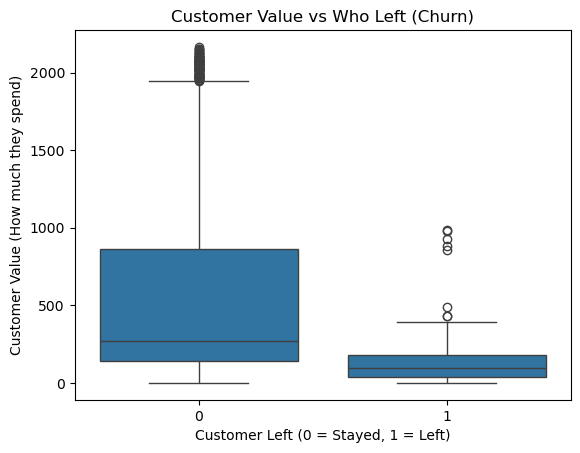

In [24]:
sns.boxplot(x='Churn', y='Customer Value', data=df)
plt.title("Customer Value vs Who Left (Churn)")
plt.xlabel("Customer Left (0 = Stayed, 1 = Left)")
plt.ylabel("Customer Value (How much they spend)")
plt.show()

In [25]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train churn rate:", y_train.mean().round(4))
print("Test churn rate:", y_test.mean().round(4))

Train churn rate: 0.1571
Test churn rate: 0.1571


In [27]:
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Shape of X (features): (3150, 13)
Shape of y (target): (3150,)
Training samples: 2520
Testing samples: 630


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("✅ Model training complete!")

✅ Model training complete!


C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Scaling done ✅")

Scaling done ✅


In [33]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, class_weight="balanced")
lr_model.fit(X_train_scaled, y_train)

print("Logistic Regression trained ✅")

Logistic Regression trained ✅


In [34]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree_model.fit(X_train_scaled, y_train)

print("Decision Tree trained ✅")

Decision Tree trained ✅


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train_scaled, y_train)

print("Random Forest trained ✅")

Random Forest trained ✅


In [36]:
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()

scale_pos_weight = neg / pos

print("scale_pos_weight:", round(scale_pos_weight, 2))

scale_pos_weight: 5.36


In [37]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

xgb_model.fit(X_train_scaled, y_train)

print("XGBoost trained ✅")

XGBoost trained ✅


In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_auc = cross_val_score(
    xgb_model,
    X_train_scaled,
    y_train,
    scoring="roc_auc",
    cv=cv
)

print("CV AUC scores:", cv_auc.round(4))
print("Mean CV AUC:", cv_auc.mean().round(4))
print("Std CV AUC:", cv_auc.std().round(4))

CV AUC scores: [0.9917 0.9846 0.9879 0.9725 0.9905]
Mean CV AUC: 0.9854
Std CV AUC: 0.0069


In [39]:
median_clv = df["Customer Value"].median()

df["CLV_Group"] = df["Customer Value"].apply(
    lambda x: "High CLV" if x >= median_clv else "Low CLV"
)

print(df["CLV_Group"].value_counts())

CLV_Group
High CLV    1577
Low CLV     1573
Name: count, dtype: int64


In [40]:
df["Churn_Probability"] = xgb_model.predict_proba(
    scaler.transform(X)
)[:, 1]

df[["Churn", "Churn_Probability"]].head()

,Churn,Churn_Probability
0,0,0.000354
1,0,0.054829
2,0,0.000265
3,0,0.001331
4,0,0.000223


In [41]:
median_prob = df["Churn_Probability"].median()

df["Churn_Risk_Group"] = df["Churn_Probability"].apply(
    lambda x: "High Risk" if x >= median_prob else "Low Risk"
)

print(df["Churn_Risk_Group"].value_counts())

Churn_Risk_Group
Low Risk     1575
High Risk    1575
Name: count, dtype: int64


In [42]:
decision_matrix = pd.crosstab(
    df["Churn_Risk_Group"],
    df["CLV_Group"]
)

print(decision_matrix)

CLV_Group         High CLV  Low CLV
Churn_Risk_Group                   
High Risk              399     1176
Low Risk              1178      397


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train) 
print("✅ Model retrained successfully with scaled data!")

✅ Model retrained successfully with scaled data!


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"✅ Model Accuracy after scaling: {accuracy:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

✅ Model Accuracy after scaling: 86.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       520
           1       0.73      0.40      0.52       110

    accuracy                           0.87       630
   macro avg       0.81      0.68      0.72       630
weighted avg       0.86      0.87      0.85       630



In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
tree_accuracy = accuracy_score(y_test, y_pred_tree) * 100
print(f"🌳 Decision Tree Accuracy: {tree_accuracy:.2f}%")

🌳 Decision Tree Accuracy: 92.86%


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf) * 100

print(f"🌲 Random Forest Accuracy: {rf_accuracy:.2f}%")

🌲 Random Forest Accuracy: 93.81%


Top 10 Most Important Features Affecting Churn:

                    Feature  Importance
1                 Complains    0.186999
4            Seconds of Use    0.134006
2      Subscription  Length    0.125800
10                   Status    0.117984
5          Frequency of use    0.110226
12           Customer Value    0.070298
7   Distinct Called Numbers    0.068556
0             Call  Failure    0.065217
6          Frequency of SMS    0.051038
8                 Age Group    0.029075


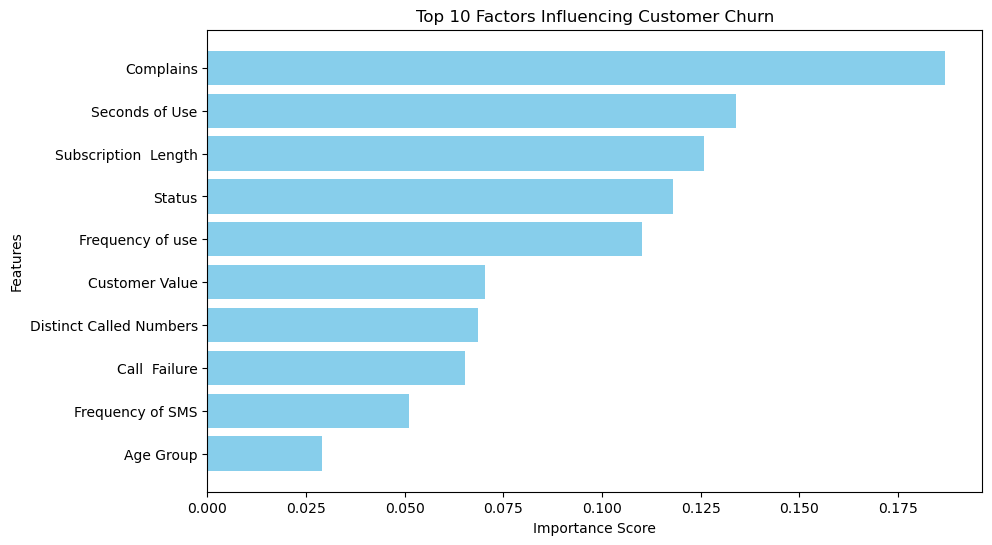

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Top 10 Most Important Features Affecting Churn:\n")
print(feature_importance_df.head(10))
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Factors Influencing Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_accuracy = accuracy_score(y_test, y_pred_svm) * 100
svm_auc = roc_auc_score(y_test, y_pred_prob_svm)
print(f"🤖 SVM Accuracy: {svm_accuracy:.2f}%")
print(f"SVM AUC Score: {svm_auc:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

🤖 SVM Accuracy: 89.68%
SVM AUC Score: 0.944

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       520
           1       0.89      0.46      0.61       110

    accuracy                           0.90       630
   macro avg       0.90      0.73      0.78       630
weighted avg       0.90      0.90      0.88       630



In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
knn_accuracy = accuracy_score(y_test, y_pred_knn) * 100
knn_auc = roc_auc_score(y_test, y_pred_prob_knn)
print(f"👥 KNN Accuracy: {knn_accuracy:.2f}%")
print(f"KNN AUC Score: {knn_auc:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

👥 KNN Accuracy: 93.02%
KNN AUC Score: 0.944

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       520
           1       0.79      0.82      0.80       110

    accuracy                           0.93       630
   macro avg       0.88      0.89      0.88       630
weighted avg       0.93      0.93      0.93       630



In [38]:
!pip install xgboost

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
xgb_accuracy = accuracy_score(y_test, y_pred_xgb) * 100
xgb_auc = roc_auc_score(y_test, y_pred_prob_xgb)
print(f"⚡ XGBoost Accuracy: {xgb_accuracy:.2f}%")
print(f"XGBoost AUC Score: {xgb_auc:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:55:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⚡ XGBoost Accuracy: 93.97%
XGBoost AUC Score: 0.980

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.87      0.77      0.82       110

    accuracy                           0.94       630
   macro avg       0.91      0.87      0.89       630
weighted avg       0.94      0.94      0.94       630



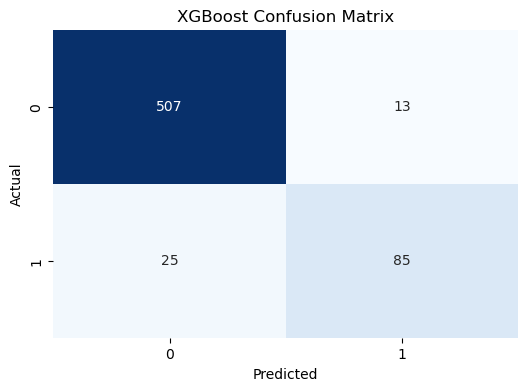

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15200\1830922179.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


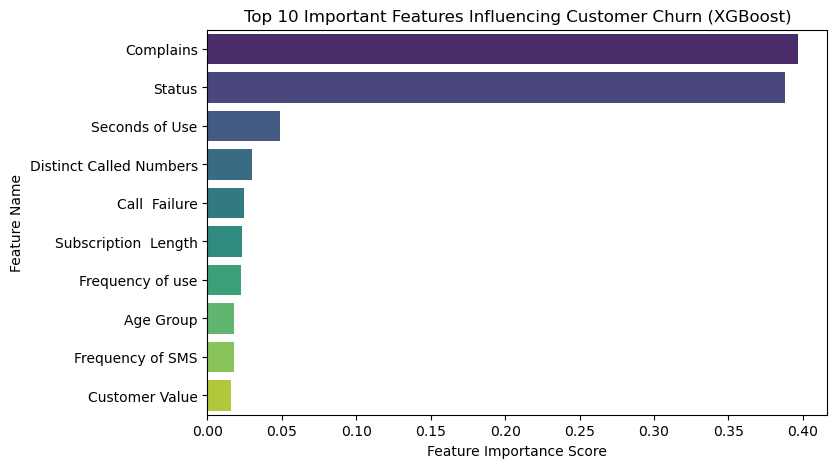

In [42]:
import pandas as pd
import numpy as np
importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title("Top 10 Important Features Influencing Customer Churn (XGBoost)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.show()

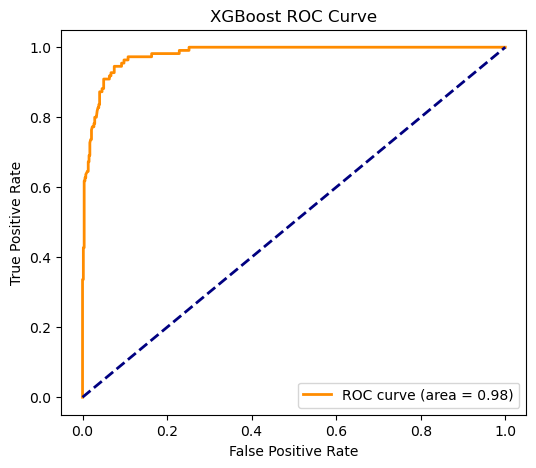

In [43]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_scaled, y_train)
y_pred_gbm = gbm_model.predict(X_test_scaled)
y_pred_prob_gbm = gbm_model.predict_proba(X_test_scaled)[:, 1]
gbm_accuracy = accuracy_score(y_test, y_pred_gbm) * 100
gbm_auc = roc_auc_score(y_test, y_pred_prob_gbm)
print(f"⚡ Gradient Boosting Machine (GBM) Accuracy: {gbm_accuracy:.2f}%")
print(f"GBM AUC Score: {gbm_auc:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_gbm))

⚡ Gradient Boosting Machine (GBM) Accuracy: 93.02%
GBM AUC Score: 0.968

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       520
           1       0.86      0.72      0.78       110

    accuracy                           0.93       630
   macro avg       0.90      0.85      0.87       630
weighted avg       0.93      0.93      0.93       630



In [4]:
import os
os.getcwd()


'C:\\Users\\Owner\\Desktop\\Folders\\my Backup'

In [5]:
os.listdir()


['.ipynb_checkpoints',
 'dvd rentals',
 'dvdrental.tar',
 'My Project.ipynb',
 'noun projects',
 'Rizamy SQL']

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Owner\Downloads\Customer Churn.csv")
print(df.shape)
df.head()


(3150, 14)


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [2]:
print("Missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


In [3]:
print("\nData types:\n")
print(df.dtypes)



Data types:

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object


In [4]:
print("\nDuplicate rows:", df.duplicated().sum())



Duplicate rows: 300


In [6]:
print("Original shape:", df.shape)

df = df.drop_duplicates()

print("New shape after removing duplicates:", df.shape)


Original shape: (2850, 14)
New shape after removing duplicates: (2850, 14)


In [7]:
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
X = df.drop(columns=["Churn"])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Clustering data shape:", X_scaled.shape)


Clustering data shape: (2850, 13)


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in range(2, 9):  # testing k from 2 to 8
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"k={k}  silhouette={score:.4f}")

best_k = max(sil_scores, key=sil_scores.get)
print("\nBest k =", best_k, "with silhouette =", round(sil_scores[best_k], 4))


C:\Users\Owner\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Owner\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Owner\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Owner\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

k=2  silhouette=0.2317
k=3  silhouette=0.2417
k=4  silhouette=0.2059
k=5  silhouette=0.2328
k=6  silhouette=0.2612
k=7  silhouette=0.2820
k=8  silhouette=0.2990

Best k = 8 with silhouette = 0.299


In [9]:
# Fit final KMeans with best_k
kmeans_final = KMeans(n_clusters=8, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Final silhouette score
final_sil = silhouette_score(X_scaled, cluster_labels)
print("Final silhouette score:", round(final_sil, 4))

# Cluster sizes
import numpy as np
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)

# Attach cluster labels to dataframe
df["Cluster"] = cluster_labels


Final silhouette score: 0.299
Cluster sizes: {np.int32(0): np.int64(201), np.int32(1): np.int64(857), np.int32(2): np.int64(290), np.int32(3): np.int64(60), np.int32(4): np.int64(352), np.int32(5): np.int64(534), np.int32(6): np.int64(187), np.int32(7): np.int64(369)}


In [10]:
# Use Customer Value as CLV proxy
df["CLV_Group"] = pd.qcut(df["Customer Value"], q=2, labels=["Low CLV", "High CLV"])

# Check distribution
df["CLV_Group"].value_counts()


CLV_Group
Low CLV     1425
High CLV    1425
Name: count, dtype: int64

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Prepare features and target
X = df.drop(columns=["Churn", "Cluster", "CLV_Group"], errors="ignore")
y = df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train XGBoost
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict probabilities
y_probs = xgb_model.predict_proba(X)[:, 1]

# Attach probabilities to dataframe
df["Churn_Probability"] = y_probs

# Check performance
y_pred_test = xgb_model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred_test), 4))
print("AUC:", round(roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]), 4))


ModuleNotFoundError: No module named 'xgboost'

In [12]:
import sys
print(sys.executable)


C:\Users\Owner\anaconda3\python.exe


In [14]:
import sys
!{sys.executable} -m pip install xgboost


In [15]:
from xgboost import XGBClassifier
print("XGBoost imported successfully")


XGBoost imported successfully


In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Owner\Downloads\Customer Churn.csv")

# Remove duplicates again (important)
df = df.drop_duplicates()

print("Shape after cleaning:", df.shape)


Shape after cleaning: (2850, 14)


In [3]:
df["CLV_Group"] = pd.qcut(df["Customer Value"], q=2, labels=["Low CLV", "High CLV"])
df["CLV_Group"].value_counts()


CLV_Group
Low CLV     1425
High CLV    1425
Name: count, dtype: int64

Accuracy: 0.9614
AUC: 0.9861


,Churn_Probability
0,0.000112
1,0.043890
2,0.000465
3,0.002446
4,0.000533


In [5]:
# Define churn risk groups using median probability
threshold = df["Churn_Probability"].median()

df["Churn_Risk_Group"] = df["Churn_Probability"].apply(
    lambda x: "High Risk" if x >= threshold else "Low Risk"
)

df["Churn_Risk_Group"].value_counts()


Churn_Risk_Group
Low Risk     1425
High Risk    1425
Name: count, dtype: int64